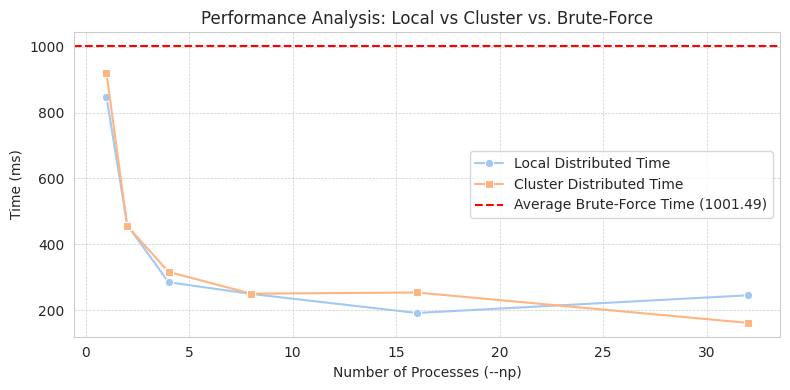

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
df_local = pd.read_csv('local.txt', delim_whitespace=True, header=None, names=['np', 'distributed', 'bruteforce'])
df_cluster = pd.read_csv('cluster.txt', delim_whitespace=True, header=None, names=['np', 'distributed', 'bruteforce'])

# Calculate the means for both local and cluster data
local_mean = df_local.groupby('np').mean()
cluster_mean = df_cluster.groupby('np').mean()

# Plotting
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")

# Plotting the local and cluster data
sns.lineplot(data=local_mean, x=local_mean.index, y='distributed', label="Local Distributed Time", marker='o')
sns.lineplot(data=cluster_mean, x=cluster_mean.index, y='distributed', label="Cluster Distributed Time", marker='s')

# Plotting the average brute-force time
avg_bf_time = (df_local['bruteforce'].mean() + df_cluster['bruteforce'].mean()) / 2
plt.axhline(avg_bf_time, color='red', linestyle='--', label=f"Average Brute-Force Time ({avg_bf_time:.2f})")

# Setting labels and title
plt.xlabel('Number of Processes (--np)')
plt.ylabel('Time (ms)')
plt.title('Performance Analysis: Local vs Cluster vs. Brute-Force')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
